## Import Libraries

In [536]:
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from matplotlib import style
style.use('ggplot')

In [537]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [538]:
# setting the plot size for graphing
plt.rcParams['figure.figsize'] = (8,6)

## Import Data

In [539]:
# Dataset source: https://github.com/Jai-Ds/Credit-Card-Segmentation--Data-Science-Capstone-project/blob/master/credit-card-data.csv
df = pd.read_csv('credit-card-data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [540]:
print(f'Data shape: {df.shape}')

Data shape: (8950, 18)


In [541]:
# Statistical Summary
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [542]:
# drop unique feature as we will not use any identifier when training
df.drop('CUST_ID', axis=1, inplace=True)

## Prepare Preprocessing

### Missing Values

In [543]:
count_missing = df.isnull().sum()
percent_missing = (count_missing/len(df))*100
missing_values = pd.concat([percent_missing, count_missing], axis=1, 
                           keys=['Percent_Of_Missing_Values', 'Counting_Of_Missing_Values'])
missing_values

,Percent_Of_Missing_Values,Counting_Of_Missing_Values
BALANCE,0.000000,0
BALANCE_FREQUENCY,0.000000,0
PURCHASES,0.000000,0
ONEOFF_PURCHASES,0.000000,0
INSTALLMENTS_PURCHASES,0.000000,0
CASH_ADVANCE,0.000000,0
PURCHASES_FREQUENCY,0.000000,0
ONEOFF_PURCHASES_FREQUENCY,0.000000,0
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0
CASH_ADVANCE_FREQUENCY,0.000000,0


3.5% of Minimum_Payments and 0.011% of Credit_Limits values are missing. To handle the missing values in Minimum_Payments, I will impute them using the median value and drop the single missing value in Credit_Limits.

In [544]:
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [545]:
df = df.drop(5203)
df = df.reset_index(drop=True) 

In [546]:
# impute using median for minimum payments
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [547]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

After fill in and drop the missing values, there are no more null in the dataframe. 

### Treat Outliers

We will BoxPlot to plot the outlier points in all the numerical columns.

In [548]:
num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

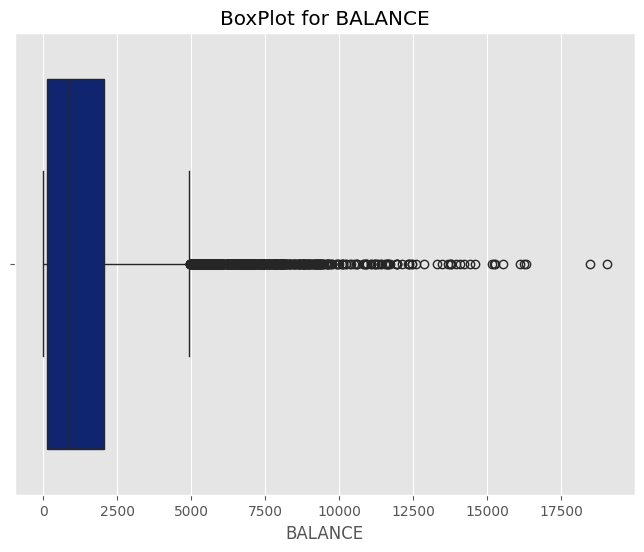

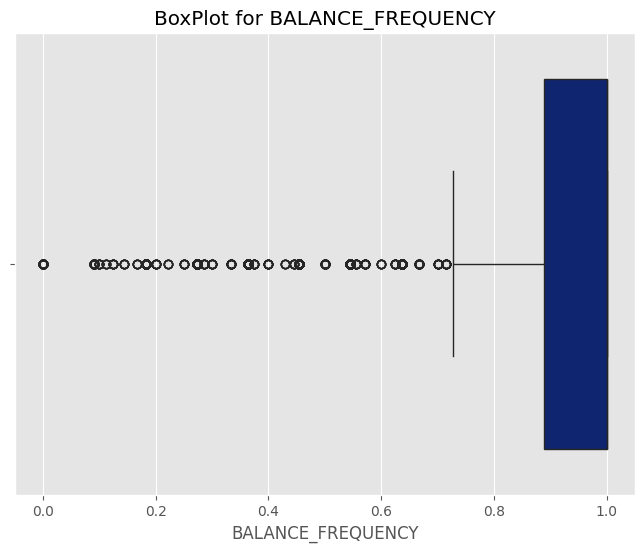

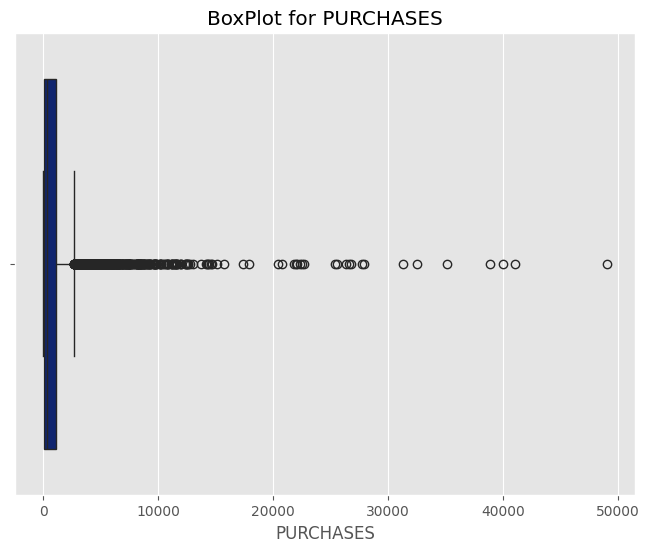

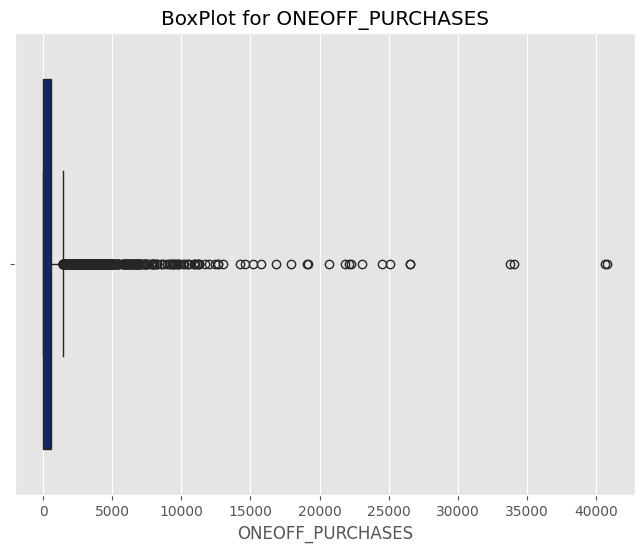

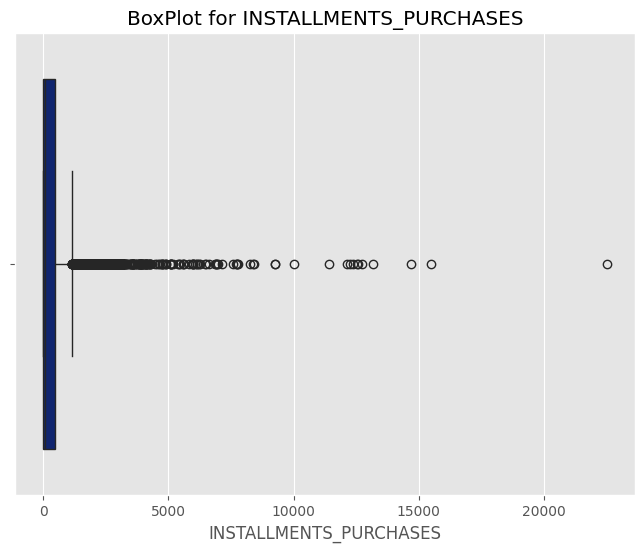

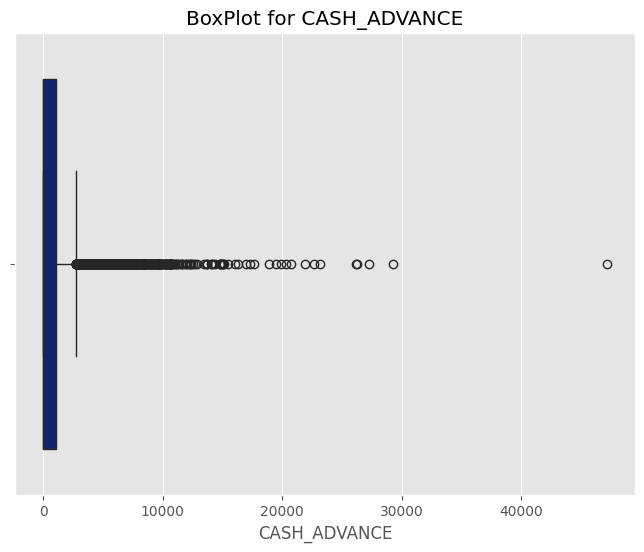

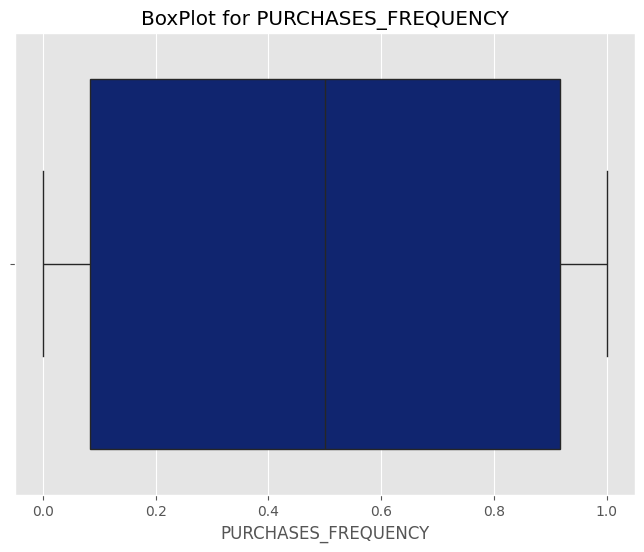

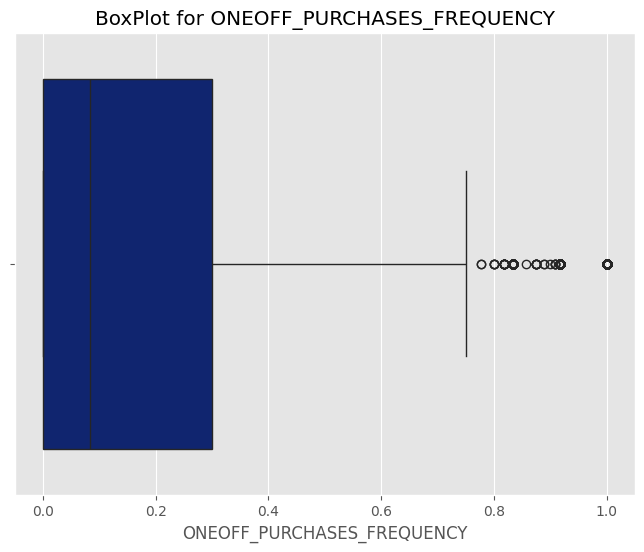

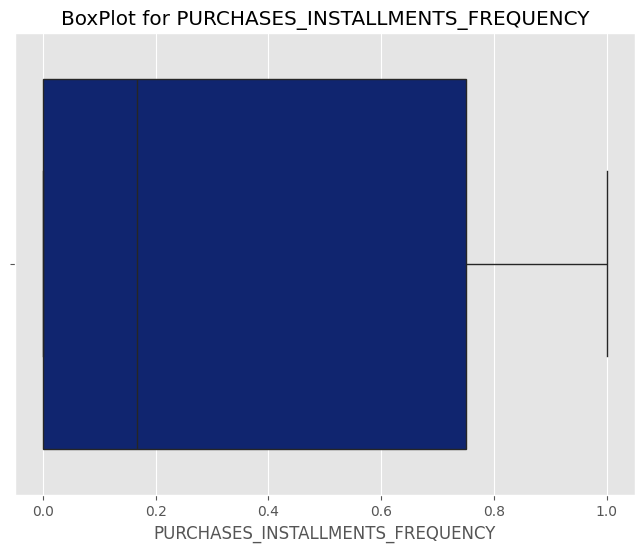

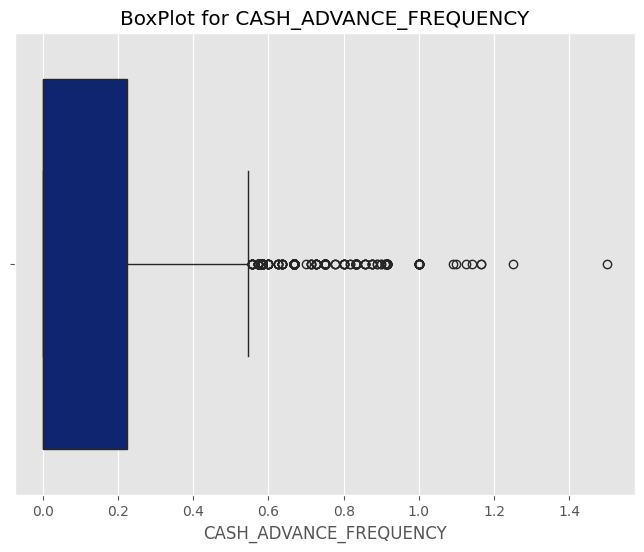

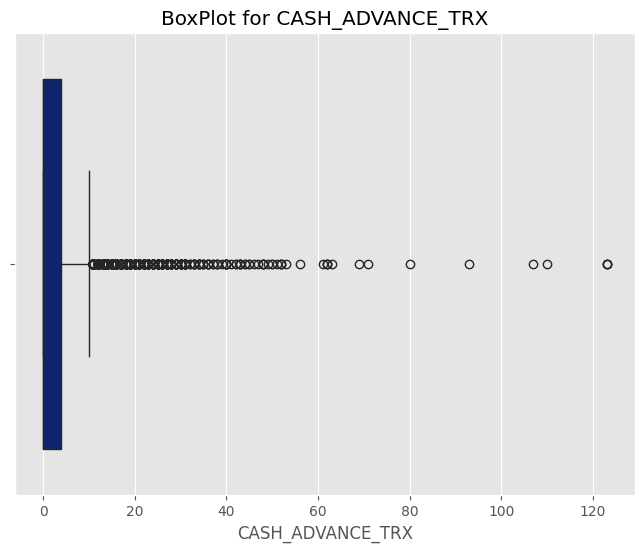

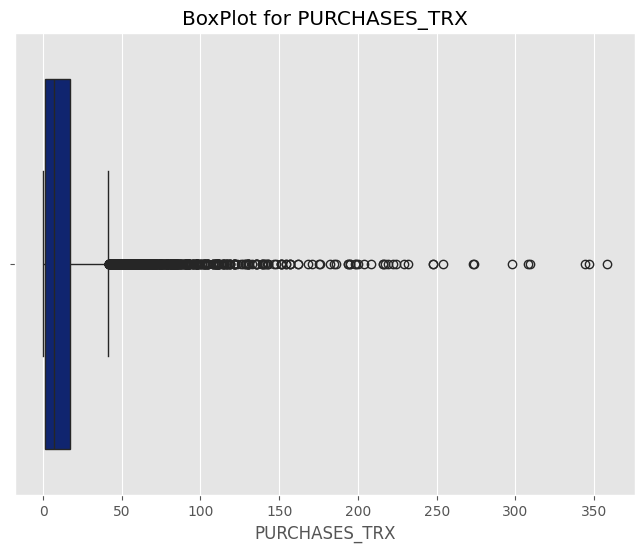

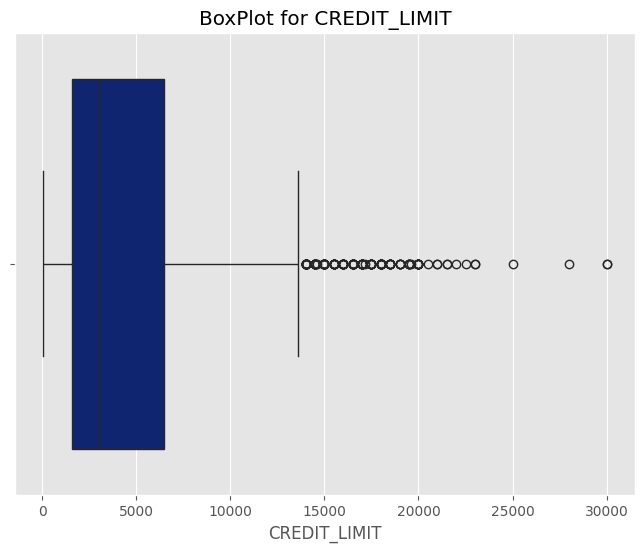

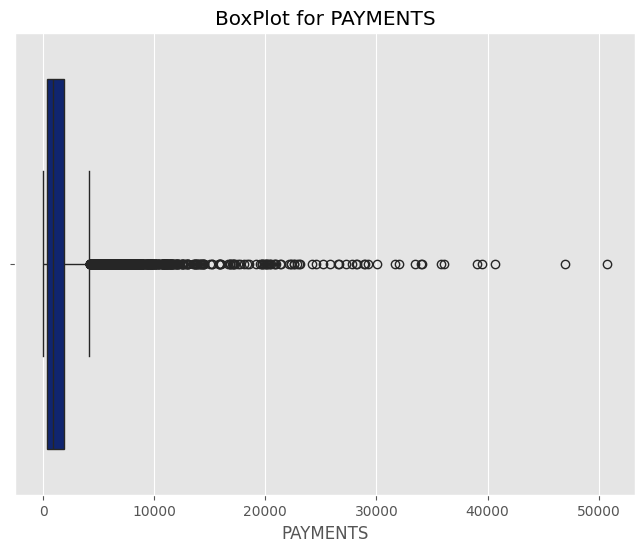

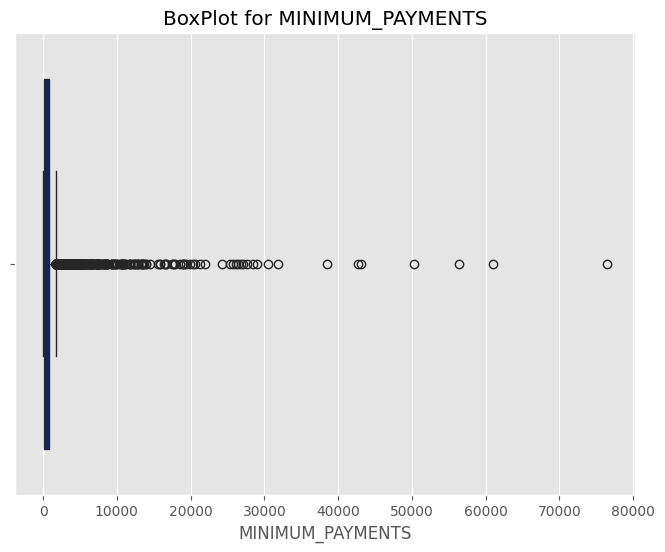

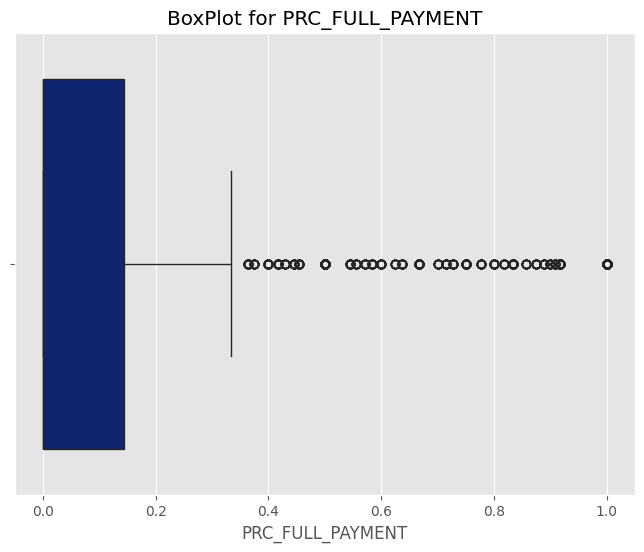

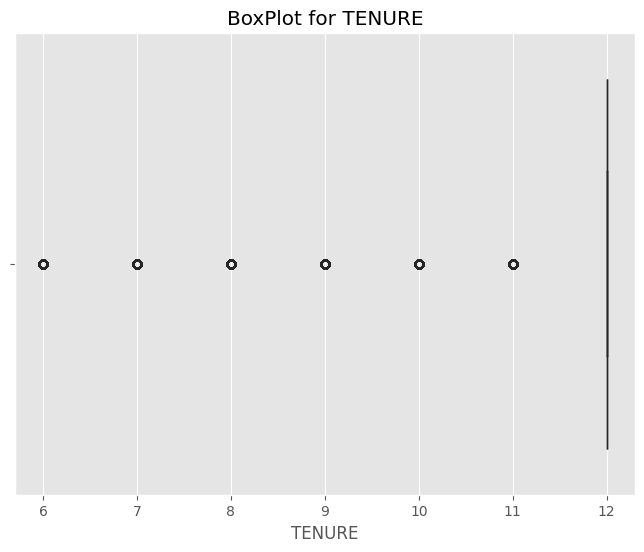

In [549]:
for i in num_vars:
    sns.boxplot(df[i], orient='h', palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

As a result, outliers are present in the data. When handling banking data, it is crucial to select an appropriate method to address outliers without removing valid values. In this case, applying a transformation is a suitable approach, as it helps correct skewness while preserving the integrity of the data.

In [550]:
from sklearn.preprocessing import PowerTransformer

In [551]:
PT = PowerTransformer(method='yeo-johnson', standardize=True)

print(PT.fit_transform(df))

[[-1.23833786 -1.0801604  -0.36831098 ... -0.82502551 -0.67793662
   0.42210751]
 [ 1.05188287 -0.4256199  -1.50536123 ...  0.91748237  1.23484635
   0.42210751]
 [ 0.86050618  0.62852726  0.52149237 ...  0.4759187  -0.67793662
   0.42210751]
 ...
 [-1.40957025 -0.9921333  -0.21655169 ... -1.30177584  1.32828513
  -2.52719186]
 [-1.55874115 -0.9921333  -1.50536123 ... -1.66214063  1.32828513
  -2.52719186]
 [-0.32454944 -1.6469605   0.70189133 ... -1.23886969 -0.67793662
  -2.52719186]]


In [552]:
df.shape

(8949, 17)

### Feature Engineering

We will learn more about the customer profile by extracting and creating new features.

#### 1. Monthly Average Purchase

In [553]:
print("The average monthly purchase for the customers are as follows:")
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']
df['Monthly_Avg_Purchase']

The average monthly purchase for the customers are as follows:


0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8944     48.520000
8945     50.000000
8946     24.066667
8947      0.000000
8948    182.208333
Name: Monthly_Avg_Purchase, Length: 8949, dtype: float64

In [554]:
df['Monthly_Avg_Purchase'] = df['PURCHASES']/df['TENURE']

#### 2. Monthly Average Cash Advance Amount

In [555]:
print('The average monthly cash advance for the customers are as follows:')
df['Monthly_Avg_Cash'] = df['CASH_ADVANCE']/df['TENURE']
df['Monthly_Avg_Cash']

The average monthly cash advance for the customers are as follows:


0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8944      0.000000
8945      0.000000
8946      0.000000
8947      6.093130
8948     21.173335
Name: Monthly_Avg_Cash, Length: 8949, dtype: float64

#### 3. Customers by Purchase Type

In [556]:
# Separate the customers by purchase type
df_purchases = df[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]

In [557]:
# Filter and count the categories
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] == 0)].shape
df_purchases[(df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape
df_purchases[(df_purchases['ONEOFF_PURCHASES'] > 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0)].shape
df.shape

(8949, 19)

In [558]:
df['Purchase_Type'] = np.where((df['ONEOFF_PURCHASES'] == 0) & (df['INSTALLMENTS_PURCHASES'] == 0),'None_Of_the_Purchases',
                    np.where((df['ONEOFF_PURCHASES'] > 0) & (df['INSTALLMENTS_PURCHASES'] == 0), 'One_Of_Purchase',
np.where((df_purchases['ONEOFF_PURCHASES'] == 0) & (df_purchases['INSTALLMENTS_PURCHASES'] > 0),'Installment_Purchases','Both_the_Purchases')))

In [559]:
purchase_dist_percent = df['Purchase_Type'] .value_counts()/len(df)*100
purchase_dist_count = df['Purchase_Type'] .value_counts()
purchase_info = pd.concat([purchase_dist_percent, purchase_dist_count], axis=1, 
                         keys=['Percent_Of_Purchase_Values', 'Counting_Of_Purchase_Values'])

purchase_info

,Percent_Of_Purchase_Values,Counting_Of_Purchase_Values
Purchase_Type,,
Both_the_Purchases,30.997877,2774
Installment_Purchases,25.254218,2260
None_Of_the_Purchases,22.807018,2041
One_Of_Purchase,20.940887,1874


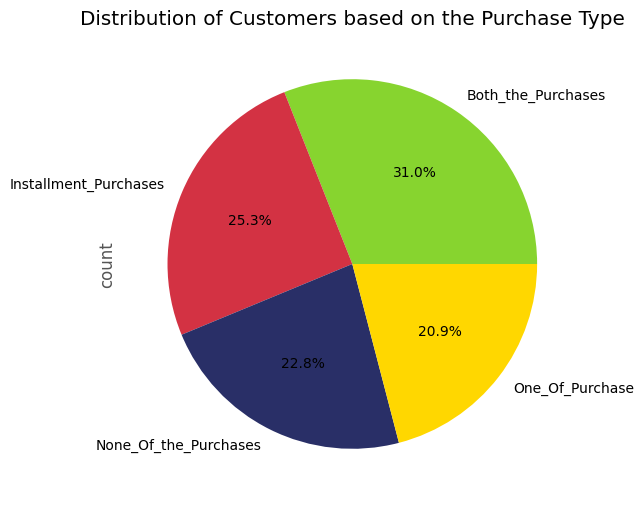

In [560]:
df['Purchase_Type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#87d42f','#d33243','#292f67','#FFD700'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()

After grouping the customers by purchase type, 31% make purchases using both methods (one-off and installment). Installment purchases slightly exceed one-off purchases, accounting for 25% and 20%, respectively, while the remaining 23% have never made a purchase.

#### 4. Limit Usage

In [561]:
df['Limit_Usage'] = df['BALANCE']/df['CREDIT_LIMIT']
df['Limit_Usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8944    0.028494
8945    0.019183
8946    0.023399
8947    0.026915
8948    0.310590
Name: Limit_Usage, Length: 8949, dtype: float64

This can allow calculation of the ratio of balance to credit limit, known as the utilization rate. A high utilization rate indicates increased credit risk, while a lower rate makes the credit more desirable.

#### 5. Payment to Minimum_Payments Ratio

In [562]:
df['Pay_to_MinimumPay'] = df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df['Pay_to_MinimumPay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8944    6.660231
8945    0.882891
8946    0.986076
8947    0.942505
8948    0.715439
Name: Pay_to_MinimumPay, Length: 8949, dtype: float64

### Insight Analysis

#### 1. Pay_to_MinimumPay over Purchase Type

In [563]:
t1 = df.groupby(by=['Purchase_Type'])['Pay_to_MinimumPay'].mean().sort_values(ascending=False)

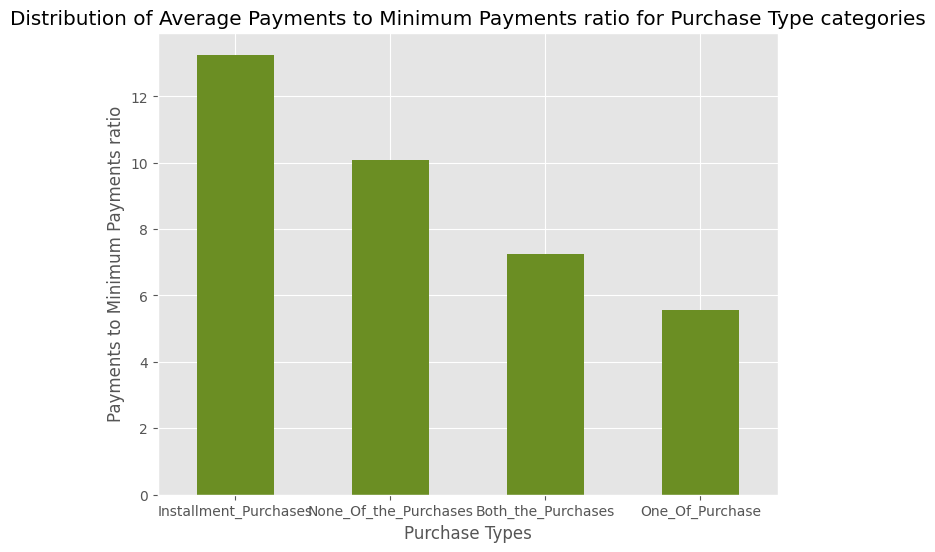

In [564]:
t1.plot(kind='bar',color='olivedrab')
plt.title('Distribution of Average Payments to Minimum Payments ratio for Purchase Type categories')
plt.xlabel('Purchase Types')
plt.ylabel('Payments to Minimum Payments ratio')
plt.xticks(rotation=0)
plt.show()

Installment purchase customers paid the highest average minimum payment dues. 

#### 2. Balance to Credit Limit ratio over Purchase Type

In [565]:
t2 = df.groupby(['Purchase_Type'])['Limit_Usage'].mean().sort_values(ascending = True).reset_index()

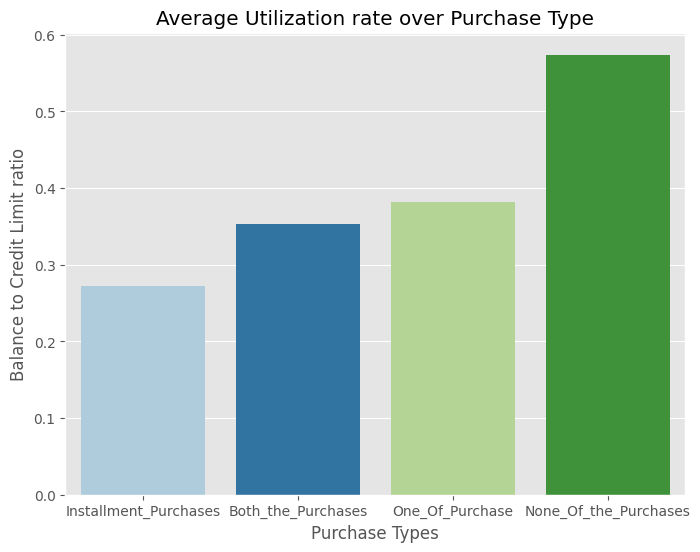

In [566]:
sns.barplot(x = t2['Purchase_Type'], y = t2['Limit_Usage'], palette='Paired')
plt.title('Average Utilization rate over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Balance to Credit Limit ratio')
plt.show()

A lower balance-to-limit ratio is more desirable and installment purchase customers have the lowest utilization rate making them more likely to have less credit risk. 

#### 3. Monthly_Avg_Purchase over Purchase Type

In [567]:
df1 = df.copy()

In [568]:
t3 = df.groupby(by=['Purchase_Type'])['Monthly_Avg_Purchase'].mean().sort_values(ascending=False) 

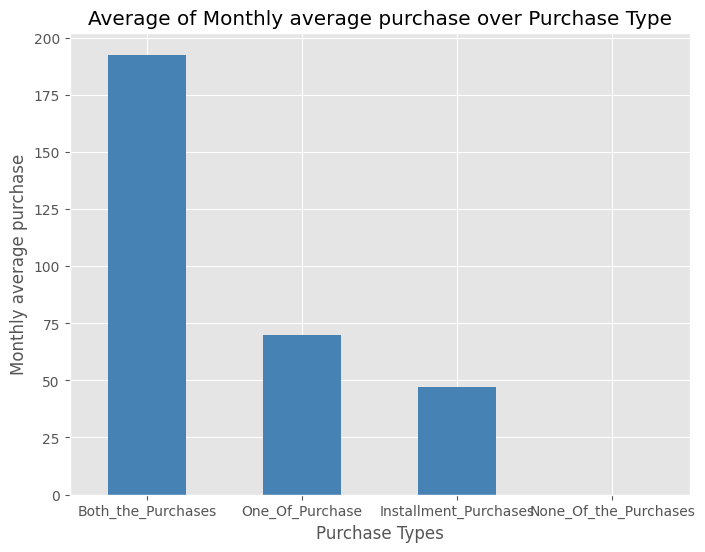

In [569]:
t3.plot(kind='bar',color='steelblue')
plt.title('Average of Monthly average purchase over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly average purchase')
plt.xticks(rotation=0)
plt.show()

Customers who make both types of purchases have made the highest total average purchase amount.

#### 4. Monthly_Cash_Advance over Purchase Type

In [570]:
t4 = df.groupby(['Purchase_Type'])['Monthly_Avg_Cash'].mean().sort_values(ascending=False).reset_index()

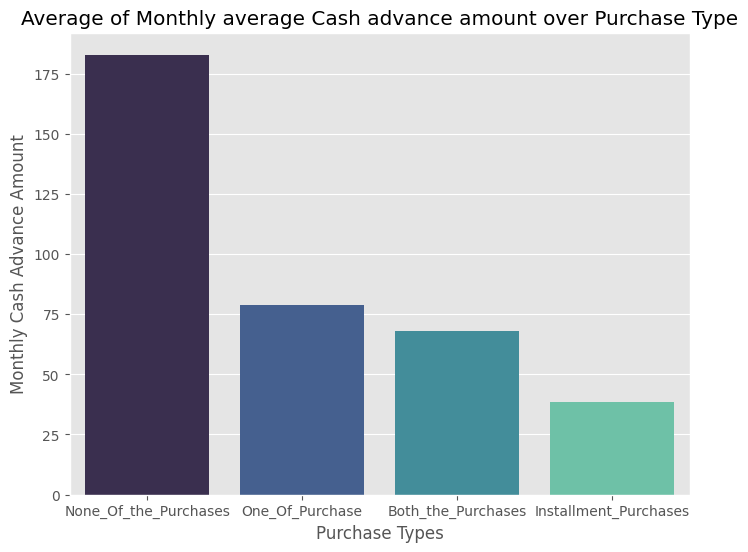

In [571]:
sns.barplot(x = t4['Purchase_Type'], y = t4['Monthly_Avg_Cash'], palette='mako')
plt.title('Average of Monthly average Cash advance amount over Purchase Type')
plt.xlabel('Purchase Types')
plt.ylabel('Monthly Cash Advance Amount')
plt.show()

Customers who made neither of both purchases have made the highest monthly average cash in advance amount.

### Correlation Matrix

To find the relationship between features.

In [572]:
df.drop(['BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','TENURE','CASH_ADVANCE'], axis=1, inplace=True)

In [573]:
corr_df = df.drop('Purchase_Type', axis=1).corr()
corr_df

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
BALANCE_FREQUENCY,1.000000,0.104257,0.124204,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,-0.095308,0.131188,0.085963,0.404557,-0.089340
ONEOFF_PURCHASES,0.104257,1.000000,0.330610,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.132745,0.913059,-0.034557,-0.042254,0.010298
INSTALLMENTS_PURCHASES,0.124204,0.330610,1.000000,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.182548,0.677016,-0.067799,-0.058318,0.020618
PURCHASES_FREQUENCY,0.229440,0.264913,0.442398,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.305761,0.395310,-0.215846,-0.201944,0.011399
ONEOFF_PURCHASES_FREQUENCY,0.202295,0.524881,0.214016,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.157497,0.499694,-0.089059,-0.092089,-0.004556
PURCHASES_INSTALLMENTS_FREQUENCY,0.175869,0.127699,0.511334,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.250049,0.314106,-0.179373,-0.161536,0.017915
CASH_ADVANCE_FREQUENCY,0.192022,-0.082622,-0.132312,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,-0.249768,-0.116102,0.628321,0.360168,-0.021861
CASH_ADVANCE_TRX,0.141516,-0.046226,-0.074017,-0.203541,-0.069116,-0.169250,0.799573,1.000000,-0.066180,-0.169807,-0.065716,0.633291,0.252596,-0.016119
PURCHASES_TRX,0.189527,0.545514,0.628097,0.568408,0.544849,0.529949,-0.131161,-0.066180,1.000000,0.162037,0.682573,-0.083411,-0.043794,0.013472
PRC_FULL_PAYMENT,-0.095308,0.132745,0.182548,0.305761,0.157497,0.250049,-0.249768,-0.169807,0.162037,1.000000,0.181755,-0.151386,-0.415701,0.018459


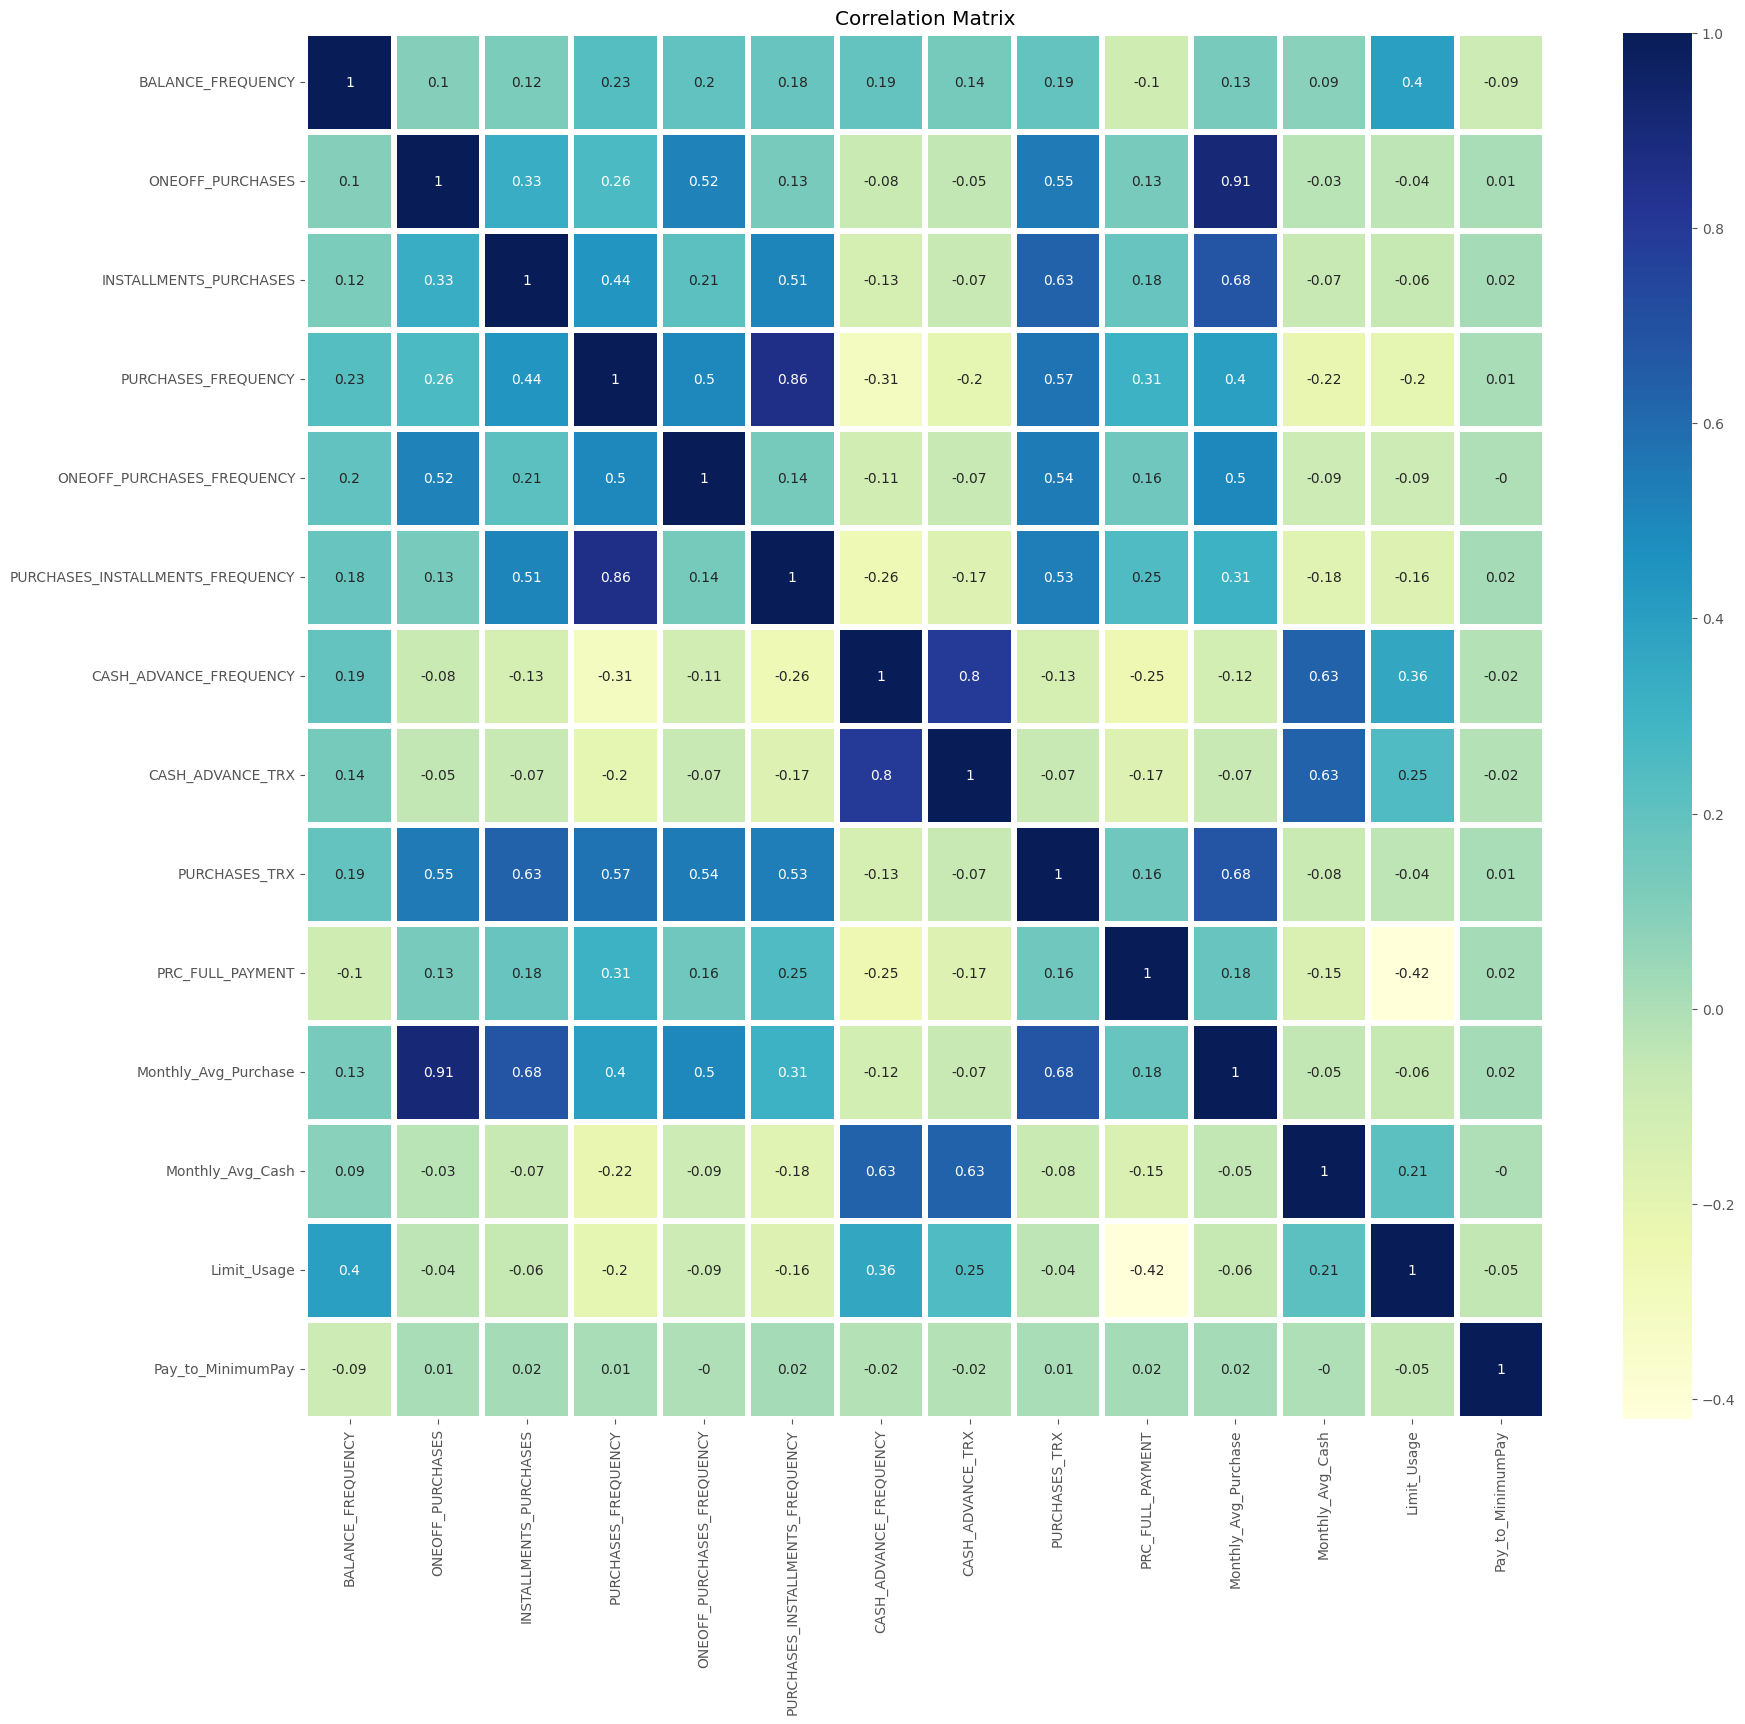

In [574]:
plt.figure(figsize=(20,18))
sns.heatmap(round(corr_df,2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

From the heatmap above, we observe the following:

1. OneOFF_Purchases is highly positively correlated with Monthly_Avg_Purchase (0.91).
2. Installment_Purchases shows a correlation of 0.63 with Purchases_Trx and 0.68 with Monthly_Avg_Purchase.
3. Purchases_Frequency is strongly correlated with Purchases_Installment_Frequency (0.86) and moderately correlated with Purchases_Trx (0.57).
4. Cash_Advance_Frequency is highly correlated with Cash_Advance_Trx (0.80) and moderately correlated with Monthly_Avg_Cash (0.63).
5. Cash_Advance_Trx is also positively correlated with Monthly_Avg_Cash (0.63).
6. Purchases_Trx has a positive correlation of 0.68 with Monthly_Avg_Purchase.

### Data Scaling

In [575]:
# Creating dummy variables for purchase type
x_cat = pd.get_dummies(df['Purchase_Type'], drop_first=True)
x_cat = x_cat.apply(lambda x: x.apply(lambda y: 1 if y else 0))
x_cat

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8944,1,0,0
8945,1,0,0
8946,1,0,0
8947,0,1,0


In [576]:
# Filtering out numerical variables
x_num = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num

['BALANCE_FREQUENCY',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'PRC_FULL_PAYMENT',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [577]:
# Filtering out numerical variables from df1
x_num_df1 = df1.dtypes[df1.dtypes != 'object'].index.to_list()
x_num_df1

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Avg_Cash',
 'Limit_Usage',
 'Pay_to_MinimumPay']

In [578]:
# Original variables concatenated with dummy variables (without scale)
original_df = pd.concat([x_cat, df1[x_num_df1]], axis=1)
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.222223,0.000000
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075


In [579]:
from sklearn.preprocessing import StandardScaler

In [580]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(df[x_num]), columns=x_num)
x_scaled.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


In [581]:
# Combining the categorical and numerical dataset 
concat_df = pd.concat([x_cat, x_scaled], axis=1)
concat_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
0,1,0,0,-0.249881,-0.356957,-0.349114,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.525588,-0.433418,-0.460737,-0.893059,-0.064423
1,0,1,0,0.134049,-0.356957,-0.454607,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.234159,-0.477461,2.319245,0.175953,-0.044287
2,0,0,1,0.517980,0.108843,-0.454607,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,-0.525588,-0.120516,-0.460737,-0.144316,-0.068272
3,0,0,1,-1.017743,0.546123,-0.454607,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,-0.525588,0.214573,-0.371944,-0.427774,-0.076663
4,0,0,1,0.517980,-0.347317,-0.454607,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.525588,-0.470074,-0.460737,0.750582,-0.053215


### Reduce Dimension

We will use PCA (Pricipal Component Analysis) as a method to reduce the dimensions.

In [582]:
from sklearn.decomposition import PCA

In [583]:
# Find the covariance matrix
cov_matrix = np.cov(concat_df.T)
print(cov_matrix.shape)
print('Covariance Matrix:', cov_matrix)

(17, 17)
Covariance Matrix: [[ 0.18878572 -0.05760378 -0.05289048 -0.05855883 -0.09015665  0.03540427
   0.12856082 -0.17142362  0.1868402  -0.1030289  -0.07341032 -0.02855805
   0.08574557 -0.05486451 -0.06615361 -0.07599021  0.00897372]
 [-0.05760378  0.17607385 -0.04776526  0.00518779 -0.08142023 -0.10369386
  -0.27862371 -0.15481222 -0.20909041  0.15684113  0.10204653 -0.13498277
  -0.08526858 -0.10890678  0.11095414  0.10835407  0.0019918 ]
 [-0.05289048 -0.04776526  0.1655753  -0.03628075  0.02451854 -0.09520935
  -0.08840125  0.08304779 -0.19206814 -0.00992445 -0.00972336 -0.06404633
  -0.03673949 -0.01913927 -0.01083133 -0.00422013 -0.00618309]
 [-0.05855883  0.00518779 -0.03628075  1.00011176  0.1042684   0.12421758
   0.22946609  0.20231737  0.17588838  0.19204378  0.14153225  0.18954776
  -0.09531866  0.13120311  0.08597276  0.40460218 -0.08935015]
 [-0.09015665 -0.08142023  0.02451854  0.1042684   1.00011176  0.33064653
   0.26494216  0.52493992  0.12771371 -0.0826314  -0.0

In [584]:
# Calculate the eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(len(eig_val))
print(eig_vec.shape)

17
(17, 17)


In [585]:
# Make the Eigen Pairs
eigen_pairs = [(eig_val[i], eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse = True)

In [586]:
# Sort the Eigen Vectors and Eigen Values
eig_val_sorted = [eigen_pairs_sorted[i][0] for i in range(len(eig_val))]
eig_vec_sorted = [eigen_pairs_sorted[i][1] for i in range(len(eig_val))]

In [587]:
# Step 5: Calculating Cumulative Variance Explained
tot = np.sum(eig_val)
exp_var = [(i/tot)*100 for i in sorted(eig_val, reverse = True)]   
tot_var = np.cumsum(exp_var)                                      
print('Cumulative Variance explained', tot_var)

Cumulative Variance explained [ 30.25572014  48.35375746  58.40942539  67.41000536  74.32002523
  80.61586649  85.38564319  88.64870161  91.63160722  94.46025558
  96.44612772  97.799846    98.89373187  99.5076423   99.77566598
  99.96929084 100.        ]


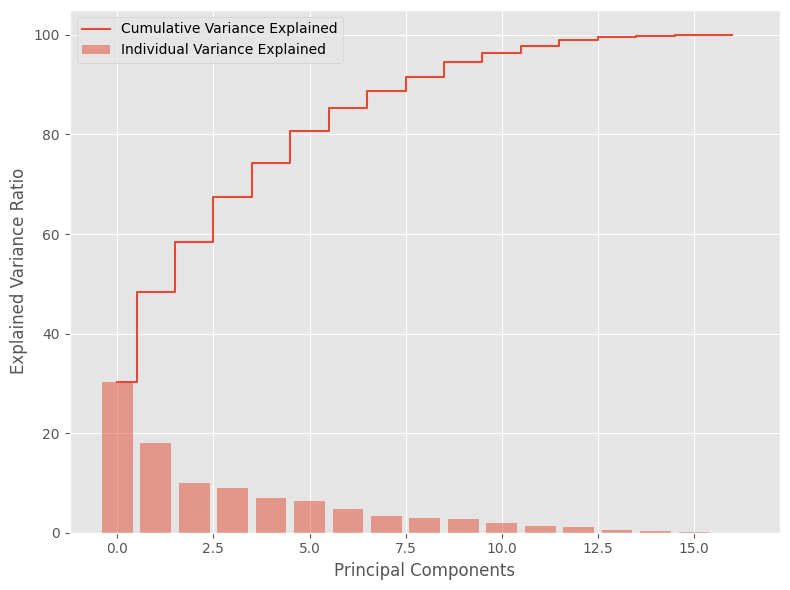

In [588]:
# Plotting the Cumulative Variance Explained
plt.bar(range(17), exp_var, alpha=0.50, align = 'center', label='Individual Variance Explained')
plt.step(range(17), tot_var, where ='mid', label='Cumulative Variance Explained')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [589]:
pca_model = PCA(n_components = 17)
X_PCA = pca_model.fit_transform(concat_df)

In [590]:
X_PCA.shape

(8949, 17)

In [591]:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.3025572 , 0.48353757, 0.58409425, 0.67410005, 0.74320025,
       0.80615866, 0.85385643, 0.88648702, 0.91631607, 0.94460256,
       0.96446128, 0.97799846, 0.98893732, 0.99507642, 0.99775666,
       0.99969291, 1.        ])

In [592]:
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var1

array([30.2557, 48.3537, 58.4094, 67.41  , 74.32  , 80.6158, 85.3856,
       88.6487, 91.6316, 94.4602, 96.4461, 97.7998, 98.8937, 99.5076,
       99.7756, 99.9692, 99.9999])

In [593]:
vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var1}, 
                       index=range(1,18)).round(4)
vec_val

,Eigen_Values,Cumulative_Variance
1,4.3968,30.2557
2,2.6300,48.3537
3,1.4613,58.4094
4,1.3080,67.4100
5,1.0042,74.3200
6,0.9149,80.6158
7,0.6931,85.3856
8,0.4742,88.6487
9,0.4335,91.6316
10,0.4111,94.4602


- We can see that all the 17 components explain the amount of variance
- The number of components chosen is 7, which cumulatively explains an 85% variation
- By considering the 7 dimensions out of the 17 variables, we are losing only about 15% of the variation (information) of the data.

In [594]:
PCA_7 = PCA(n_components=7)
X_PCA_7 = PCA_7.fit_transform(concat_df)

In [595]:
PC = pd.DataFrame(X_PCA_7, columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7'.split()])
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.963797,-1.466063,-0.395737,0.147147,0.113362,-0.452822,-0.161024
1,-2.209442,0.931402,-0.333874,-0.799582,-0.191202,-0.214703,0.703046
2,1.007415,-0.162731,-0.841429,1.325162,-0.822963,2.170478,-1.088306
3,-0.866781,-0.770916,-1.725054,0.148277,0.109396,-0.527342,-0.380985
4,-1.306443,-0.603864,-0.469885,1.500899,0.189492,0.023789,0.418797
...,...,...,...,...,...,...,...
8944,1.055194,-1.518576,1.542865,-0.646465,-0.416310,0.319131,0.680914
8945,0.739634,-1.224406,1.556767,0.090250,0.053046,-0.007028,-0.533323
8946,0.427028,-1.622618,0.976104,-0.482658,-0.177350,-0.023084,-0.129768
8947,-1.473409,-0.962832,-0.786342,-0.353589,-0.230467,-0.234425,0.658129


In [596]:
list_cols = concat_df.columns

In [597]:
PC_with_all_variables = pd.DataFrame(PCA_7.components_.T, columns = ['PC_'+str(i) for i in range(1,8)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Installment_Purchases,0.021621,-0.096068,0.167382,-0.081993,0.035790,-0.098499,0.024403
None_Of_the_Purchases,-0.111658,0.049028,-0.056590,0.011716,0.038701,-0.079623,0.132863
One_Of_Purchase,-0.030272,-0.008406,-0.146727,0.052925,-0.051245,0.102323,-0.051700
BALANCE_FREQUENCY,0.071734,0.291641,0.320955,0.422057,-0.094484,0.296063,0.460078
ONEOFF_PURCHASES,0.302709,0.226554,-0.462988,0.056258,-0.002324,-0.048950,0.082206
INSTALLMENTS_PURCHASES,0.327399,0.139030,0.110014,-0.097894,0.209276,-0.473947,0.131399
PURCHASES_FREQUENCY,0.381713,-0.011713,0.371278,-0.051380,-0.081538,0.246192,-0.227260
ONEOFF_PURCHASES_FREQUENCY,0.288618,0.156734,-0.248066,0.116115,-0.227363,0.538702,-0.269548
PURCHASES_INSTALLMENTS_FREQUENCY,0.331829,-0.030934,0.525154,-0.119609,0.063193,-0.064535,-0.145781
CASH_ADVANCE_FREQUENCY,-0.218531,0.460878,0.071948,-0.218216,-0.045807,0.043832,-0.008001


In [598]:
# Variance explained by each of the component
pd.Series(PCA_7.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,8)])

PC_1    30.255720
PC_2    18.098037
PC_3    10.055668
PC_4     9.000580
PC_5     6.910020
PC_6     6.295841
PC_7     4.769777
dtype: float64

In [599]:
Loadings = pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T, index= list_cols,columns=['PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 PC17'.split()])

## Model Training

In [600]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

### Find Optimal K-values

In [601]:
wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,9):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(X_PCA_7)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(X_PCA_7, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print()

Number of clusters: 3
KMeans Inertia 74229.55426095678
Silhouette Score for KMeans: 0.24771728367681076

Number of clusters: 4
KMeans Inertia 63708.47844024189
Silhouette Score for KMeans: 0.2598446210158973

Number of clusters: 5
KMeans Inertia 55828.72125665098
Silhouette Score for KMeans: 0.28863159397567334

Number of clusters: 6
KMeans Inertia 48750.1962010008
Silhouette Score for KMeans: 0.28834806246918065

Number of clusters: 7
KMeans Inertia 42424.948005366896
Silhouette Score for KMeans: 0.30245136508554454

Number of clusters: 8
KMeans Inertia 38669.771711628375
Silhouette Score for KMeans: 0.30720262569540674



#### Elbow Method

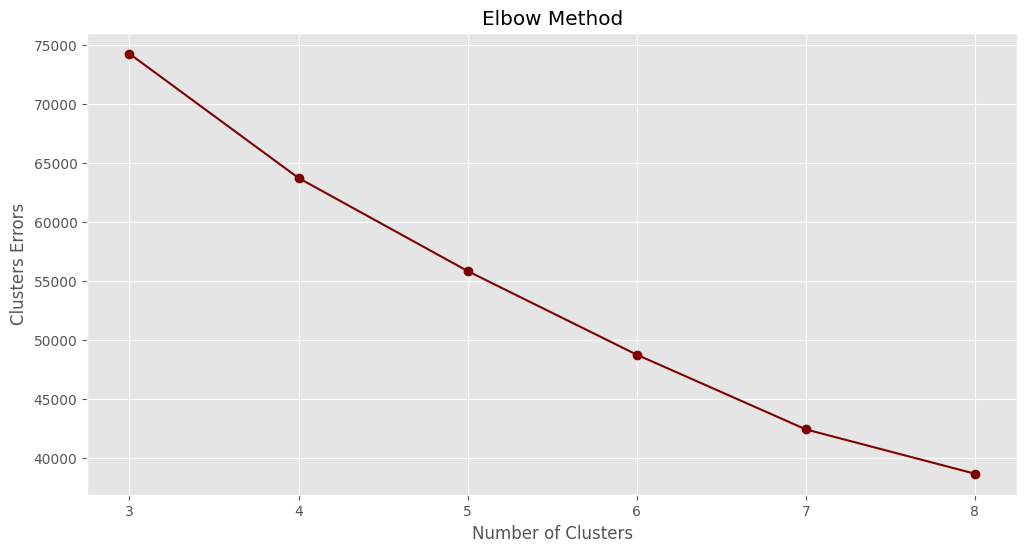

In [602]:
plt.figure(figsize=(12,6))
plt.plot(range(3,9), wcss, c ='#800000', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clusters Errors')
plt.show()

The sum of squared distance of each data point within a cluster from its respective centriod is called the inertia. The K at which the inertia stops to drop significantly is the most optimal one.

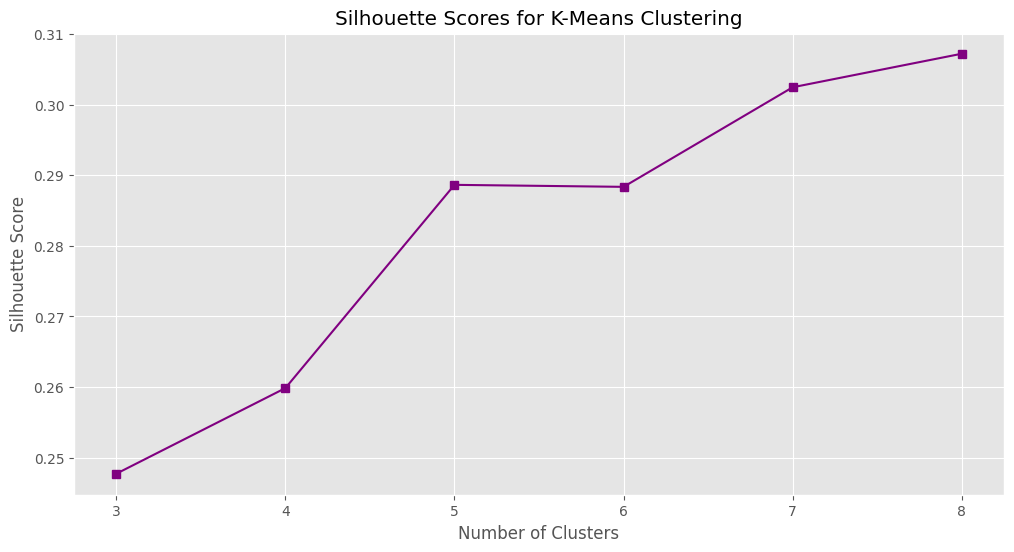

In [603]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering
plt.figure(figsize=(12,6))
plt.plot(range(3,9), sil_kmeans, marker='s', c='purple')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

We can observe that clusters for K = 4 and K = 5 appear similar.

The highest Silhouette Score is achieved at K = 5 (0.28857), followed closely by K = 4 (0.26015). Since these clusters are quite similar, we will now apply additional methods and best practices. By analyzing segment distribution and conducting profiling, we will compare the similarities and differences between segments to determine which clustering solution provides the best insights.

Make K-Means cluster and labels for finding out the distribution of segments and then perform customer profiling.

In [604]:
# K = 3
km_3 = KMeans(n_clusters = 3, n_init = 100, init='k-means++', random_state = 0)             
KM_3 = km_3.fit(X_PCA_7)
KM_3.labels_
KM_3.cluster_centers_

array([[ 0.4269537 , -1.00110014,  0.21244661, -0.15154736, -0.02528433,
         0.01799619, -0.13901803],
       [ 3.78069669,  1.33922307, -0.48082937,  0.06292302, -0.03874888,
         0.12535988, -0.16345239],
       [-1.76579907,  0.93581749, -0.13684212,  0.18557165,  0.04642686,
        -0.06375205,  0.23968812]])

In [605]:
KM_4 = KMeans(n_clusters = 4, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_5 = KMeans(n_clusters = 5, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_6 = KMeans(n_clusters = 6, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)
KM_7 = KMeans(n_clusters = 7, n_init = 100, init='k-means++', random_state = 0).fit(X_PCA_7)

In [606]:
# Appending the cluster labels to the Original Data
original_df['cluster_3'] = KM_3.labels_
original_df['cluster_4'] = KM_4.labels_
original_df['cluster_5'] = KM_5.labels_
original_df['cluster_6'] = KM_6.labels_
original_df['cluster_7'] = KM_7.labels_

In [607]:
original_df.head()

,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,12,7.950000,0.000000,0.040901,1.446508,0,0,1,1,3
1,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,12,0.000000,536.912124,0.457495,3.826241,2,3,3,4,2
2,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,12,64.430833,0.000000,0.332687,0.991682,0,2,4,0,5
3,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,12,124.916667,17.149001,0.222223,0.000000,0,0,1,1,3
4,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,12,1.333333,0.000000,0.681429,2.771075,2,0,3,4,2


### Segment Distribution

In [608]:
pd.Series.sort_index(original_df.cluster_3.value_counts())/sum(original_df.cluster_3.value_counts())
pd.Series.sort_index(original_df.cluster_4.value_counts())/sum(original_df.cluster_4.value_counts())
pd.Series.sort_index(original_df.cluster_5.value_counts())/sum(original_df.cluster_5.value_counts())
pd.Series.sort_index(original_df.cluster_6.value_counts())/sum(original_df.cluster_6.value_counts())
pd.Series.sort_index(original_df.cluster_7.value_counts())/sum(original_df.cluster_7.value_counts())

cluster_7
0    0.256788
1    0.091854
2    0.329087
3    0.160577
4    0.011510
5    0.149514
6    0.000670
Name: count, dtype: float64

In [609]:
size=pd.concat([pd.Series(original_df.cluster_3.size), pd.Series.sort_index(original_df.cluster_3.value_counts()), pd.Series.sort_index(original_df.cluster_4.value_counts()),
           pd.Series.sort_index(original_df.cluster_5.value_counts()), pd.Series.sort_index(original_df.cluster_6.value_counts()), pd.Series.sort_index(original_df.cluster_7.value_counts()) ])

size

0    8949
0    4541
1    1052
2    3356
0    3898
1     364
2    3448
3    1239
0     855
1    1503
2     314
3    3028
4    3249
0    3247
1    1504
2     861
3     315
4    3015
5       7
0    2298
1     822
2    2945
3    1437
4     103
5    1338
6       6
dtype: int64

In [610]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/original_df.cluster_3.size, columns=['Seg_Pct'])

# Taking Transpose of Segment Percentage :
Seg_Pct.T

# Concatenating the Segment Size and Segment Percentage:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,3,4,5,0,1,2,3,4,5,6
Seg_size,8949.0,4541.000000,1052.000000,3356.000000,3898.000000,364.000000,3448.000000,1239.000000,855.000000,1503.000000,...,315.000000,3015.000000,7.000000,2298.000000,822.000000,2945.000000,1437.000000,103.00000,1338.000000,6.00000
Seg_Pct,1.0,0.507431,0.117555,0.375014,0.435579,0.040675,0.385294,0.138451,0.095541,0.167952,...,0.035199,0.336909,0.000782,0.256788,0.091854,0.329087,0.160577,0.01151,0.149514,0.00067


In [611]:
# Overall each variables wise Avg:
original_df.apply(np.mean).T

Installment_Purchases                  0.252542
None_Of_the_Purchases                  0.228070
One_Of_Purchase                        0.209409
BALANCE                             1564.647593
BALANCE_FREQUENCY                      0.877350
PURCHASES                           1003.316936
ONEOFF_PURCHASES                     592.503572
INSTALLMENTS_PURCHASES               411.113579
CASH_ADVANCE                         978.959616
PURCHASES_FREQUENCY                    0.490405
ONEOFF_PURCHASES_FREQUENCY             0.202480
PURCHASES_INSTALLMENTS_FREQUENCY       0.364478
CASH_ADVANCE_FREQUENCY                 0.135141
CASH_ADVANCE_TRX                       3.249078
PURCHASES_TRX                         14.711476
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.336511
MINIMUM_PAYMENTS                     845.003358
PRC_FULL_PAYMENT                       0.153732
TENURE                                11.517935
Monthly_Avg_Purchase                  86

### Customer Profiling

To differentiate between each cluster and learn the unique characteristics of them. We will compare their score with the mean value and give definition to them based on that score.

In [612]:
Profiling_output = pd.concat([original_df.apply(lambda x: x.mean()).T, 
                original_df.groupby('cluster_3').apply(lambda x: x.mean()).T, 
               original_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
               original_df.groupby('cluster_5').apply(lambda x: x.mean()).T,
                             original_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
                             original_df.groupby('cluster_7').apply(lambda x: x.mean()).T], axis=1)
Profiling_output

,0,0,1,2,0,1,2,3,0,1,...,3,4,5,0,1,2,3,4,5,6
Installment_Purchases,0.252542,0.439991,0.017110,0.072706,0.178040,0.024725,0.420244,0.087167,0.088889,0.383234,...,0.028571,0.116086,0.571429,0.602698,0.086375,0.098132,0.352818,0.038835,0.000000,0.666667
None_Of_the_Purchases,0.228070,0.031271,0.000000,0.565852,0.368394,0.000000,0.000000,0.488297,0.435088,0.180971,...,0.000000,0.463018,0.428571,0.000000,0.444039,0.475722,0.189979,0.000000,0.000000,0.333333
One_Of_Purchase,0.209409,0.208985,0.073194,0.252682,0.337609,0.082418,0.078016,0.209040,0.210526,0.314704,...,0.082540,0.303814,0.000000,0.000000,0.212895,0.305263,0.330550,0.077670,0.236921,0.000000
BALANCE,1564.647593,669.720428,2427.499170,2505.095863,1203.979966,3298.332115,1005.386304,3746.370085,3998.160288,131.880265,...,3402.702829,1923.799584,1.796679,944.441897,4007.065996,1941.736061,132.100112,4090.177368,1650.488920,2.095923
BALANCE_FREQUENCY,0.877350,0.802885,0.984572,0.944498,0.792537,0.986581,0.930965,0.962884,0.956760,0.419653,...,0.985994,0.976004,0.277597,0.952436,0.956350,0.976044,0.412253,0.977846,0.977020,0.293561
PURCHASES,1003.316936,718.590407,4725.458517,221.806275,288.413597,8175.530137,1260.700551,429.102978,547.991345,351.380546,...,8764.755048,256.689267,425.322857,923.772733,522.474818,242.389036,336.345685,14516.761456,2788.498558,496.210000
ONEOFF_PURCHASES,592.503572,330.444136,3088.050741,164.820700,227.582832,5473.465659,601.478095,281.645375,353.699368,215.104458,...,5881.118032,206.240328,0.000000,175.753146,333.907056,199.491260,219.597898,9530.262233,2047.295359,0.000000
INSTALLMENTS_PURCHASES,411.113579,388.492504,1637.978118,57.138850,61.033864,2703.712830,659.568535,147.539661,194.332585,136.473560,...,2885.541778,50.734385,425.322857,748.669930,188.610000,43.190007,116.954328,4986.499223,741.203199,496.210000
CASH_ADVANCE,978.959616,162.319471,692.816032,2173.651496,611.747679,569.776134,245.588648,4295.342195,5114.476147,347.340559,...,591.424217,933.372151,417.321256,272.236340,5184.981388,953.512399,359.656374,961.770545,333.476506,480.273063
PURCHASES_FREQUENCY,0.490405,0.634919,0.954167,0.149489,0.173321,0.951210,0.884092,0.257017,0.308144,0.283195,...,0.948753,0.158753,0.476190,0.877080,0.294034,0.147665,0.263243,0.932686,0.910956,0.555555


In [613]:
customer_profile=pd.concat([Seg_size.T, Seg_Pct.T, Profiling_output], axis=0)
customer_profile = customer_profile.round(2)
customer_profile.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                 'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                 'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5', 'KM6_6',
                                 'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5', 'KM7_6', 'KM7_7']

customer_profile.to_csv('Cluster_Profile.csv')

In [614]:
customer_profile

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7
Seg_size,8949.00,4541.00,1052.00,3356.00,3898.00,364.00,3448.00,1239.00,855.00,1503.00,...,315.00,3015.00,7.00,2298.00,822.00,2945.00,1437.00,103.00,1338.00,6.00
Seg_Pct,1.00,0.51,0.12,0.38,0.44,0.04,0.39,0.14,0.10,0.17,...,0.04,0.34,0.00,0.26,0.09,0.33,0.16,0.01,0.15,0.00
Installment_Purchases,0.25,0.44,0.02,0.07,0.18,0.02,0.42,0.09,0.09,0.38,...,0.03,0.12,0.57,0.60,0.09,0.10,0.35,0.04,0.00,0.67
None_Of_the_Purchases,0.23,0.03,0.00,0.57,0.37,0.00,0.00,0.49,0.44,0.18,...,0.00,0.46,0.43,0.00,0.44,0.48,0.19,0.00,0.00,0.33
One_Of_Purchase,0.21,0.21,0.07,0.25,0.34,0.08,0.08,0.21,0.21,0.31,...,0.08,0.30,0.00,0.00,0.21,0.31,0.33,0.08,0.24,0.00
BALANCE,1564.65,669.72,2427.50,2505.10,1203.98,3298.33,1005.39,3746.37,3998.16,131.88,...,3402.70,1923.80,1.80,944.44,4007.07,1941.74,132.10,4090.18,1650.49,2.10
BALANCE_FREQUENCY,0.88,0.80,0.98,0.94,0.79,0.99,0.93,0.96,0.96,0.42,...,0.99,0.98,0.28,0.95,0.96,0.98,0.41,0.98,0.98,0.29
PURCHASES,1003.32,718.59,4725.46,221.81,288.41,8175.53,1260.70,429.10,547.99,351.38,...,8764.76,256.69,425.32,923.77,522.47,242.39,336.35,14516.76,2788.50,496.21
ONEOFF_PURCHASES,592.50,330.44,3088.05,164.82,227.58,5473.47,601.48,281.65,353.70,215.10,...,5881.12,206.24,0.00,175.75,333.91,199.49,219.60,9530.26,2047.30,0.00
INSTALLMENTS_PURCHASES,411.11,388.49,1637.98,57.14,61.03,2703.71,659.57,147.54,194.33,136.47,...,2885.54,50.73,425.32,748.67,188.61,43.19,116.95,4986.50,741.20,496.21


In [615]:
df = pd.read_csv('CONSOLIDATED DATA CLEAN.csv')
cust_id = df['CUSTOMER_NUM']
original_df['CUSTOMER_NUM'] = cust_id

cust_id = original_df.pop('CUSTOMER_NUM')
original_df.insert(0, 'CUSTOMER_NUM', cust_id)
print(original_df.shape)
original_df.head()

(8949, 30)


,CUSTOMER_NUM,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,4116046,1,0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,...,12,7.950000,0.000000,0.040901,1.446508,0,0,1,1,3
1,4086810,0,1,0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,...,12,0.000000,536.912124,0.457495,3.826241,2,3,3,4,2
2,3994785,0,0,1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,...,12,64.430833,0.000000,0.332687,0.991682,0,2,4,0,5
3,4103880,0,0,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,...,12,124.916667,17.149001,0.222223,0.000000,0,0,1,1,3
4,4111790,0,0,1,817.714335,1.000000,16.00,16.00,0.0,0.000000,...,12,1.333333,0.000000,0.681429,2.771075,2,0,3,4,2


In [616]:
original_df.to_csv('Customer_Data.csv')

In [617]:
print(f"Inertia KM3: {KM_3.inertia_}")
print(f"Inertia KM4: {KM_4.inertia_}")
print(f"Inertia KM5: {KM_5.inertia_}")
print(f"Inertia KM6: {KM_6.inertia_}")
print(f"Inertia KM7: {KM_7.inertia_}")

Inertia KM3: 74229.55426095678
Inertia KM4: 63708.47844024189
Inertia KM5: 55828.72125665098
Inertia KM6: 48750.1962010008
Inertia KM7: 42424.948005366896


In [618]:
from sklearn.metrics import davies_bouldin_score

db_score_3 = davies_bouldin_score(X_PCA_7, KM_3.labels_)
db_score_4 = davies_bouldin_score(X_PCA_7, KM_4.labels_)
db_score_5 = davies_bouldin_score(X_PCA_7, KM_5.labels_)
db_score_6 = davies_bouldin_score(X_PCA_7, KM_6.labels_)
db_score_7 = davies_bouldin_score(X_PCA_7, KM_7.labels_)

print(f"Davies-Bouldin Index 3: {db_score_3}")
print(f"Davies-Bouldin Index 4: {db_score_4}")
print(f"Davies-Bouldin Index 5: {db_score_5}")
print(f"Davies-Bouldin Index 6: {db_score_6}")
print(f"Davies-Bouldin Index 7: {db_score_7}")

Davies-Bouldin Index 3: 1.4260819380552145
Davies-Bouldin Index 4: 1.2797242351530906
Davies-Bouldin Index 5: 1.1329801543141027
Davies-Bouldin Index 6: 1.0227577661296465
Davies-Bouldin Index 7: 1.0672661523287001


In [619]:
sil_score3 = silhouette_score(X_PCA_7, KM_3.labels_)
sil_score4 = silhouette_score(X_PCA_7, KM_4.labels_)
sil_score5 = silhouette_score(X_PCA_7, KM_5.labels_)
sil_score6 = silhouette_score(X_PCA_7, KM_6.labels_)
sil_score7 = silhouette_score(X_PCA_7, KM_7.labels_)

print(f"Silhouette Score Cluster 3: {sil_score3}")
print(f"Silhouette Score Cluster 4: {sil_score4}")
print(f"Silhouette Score Cluster 5: {sil_score5}")
print(f"Silhouette Score Cluster 6: {sil_score6}")
print(f"Silhouette Score Cluster 7: {sil_score7}")

Silhouette Score Cluster 3: 0.24771728367681076
Silhouette Score Cluster 4: 0.2598446210158973
Silhouette Score Cluster 5: 0.28863159397567334
Silhouette Score Cluster 6: 0.28834806246918065
Silhouette Score Cluster 7: 0.30245136508554454


## Extract Selected Cluster

After the evaluating the cluster profile, I can choose any of the cluster to dissect and analyze. I decided to go with KM5_5 as it has the largest customer proportion and the value in term of payment and balance is similar or higher than the means. However, any of the cluster can be chosen to analyze. 

In [620]:
target_cluster = original_df[original_df['cluster_5'] == 4]
print(target_cluster.shape)
target_cluster.head()

(3249, 30)


,CUSTOMER_NUM,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
2,3994785,0,0,1,2495.148862,1.0,773.17,773.17,0.00,0.0,...,12,64.430833,0.0,0.332687,0.991682,0,2,4,0,5
5,4088879,1,0,0,1809.828751,1.0,1333.28,0.00,1333.28,0.0,...,12,111.106667,0.0,1.005460,0.581601,0,2,4,0,0
7,4082996,1,0,0,1823.652743,1.0,436.20,0.00,436.20,0.0,...,12,36.350000,0.0,0.792892,1.276357,0,2,4,0,0
10,4116109,1,0,0,1293.124939,1.0,920.12,0.00,920.12,0.0,...,12,76.676667,0.0,1.077604,0.498597,0,2,4,0,0
12,4102976,0,0,0,1516.928620,1.0,3217.99,2500.23,717.76,0.0,...,12,268.165833,0.0,0.505643,1.240830,1,2,4,0,5


In [622]:
target_cluster.drop(columns={'cluster_3', 'cluster_4', 'cluster_6', 'cluster_7', 'cluster_5'}, inplace=True)
target_cluster.head()

,CUSTOMER_NUM,Installment_Purchases,None_Of_the_Purchases,One_Of_Purchase,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash,Limit_Usage,Pay_to_MinimumPay
2,3994785,0,0,1,2495.148862,1.0,773.17,773.17,0.00,0.0,...,12,7500.0,622.066742,627.284787,0.00,12,64.430833,0.0,0.332687,0.991682
5,4088879,1,0,0,1809.828751,1.0,1333.28,0.00,1333.28,0.0,...,8,1800.0,1400.057770,2407.246035,0.00,12,111.106667,0.0,1.005460,0.581601
7,4082996,1,0,0,1823.652743,1.0,436.20,0.00,436.20,0.0,...,12,2300.0,679.065082,532.033990,0.00,12,36.350000,0.0,0.792892,1.276357
10,4116109,1,0,0,1293.124939,1.0,920.12,0.00,920.12,0.0,...,12,1200.0,1083.301007,2172.697765,0.00,12,76.676667,0.0,1.077604,0.498597
12,4102976,0,0,0,1516.928620,1.0,3217.99,2500.23,717.76,0.0,...,26,3000.0,608.263689,490.207013,0.25,12,268.165833,0.0,0.505643,1.240830


In [623]:
target_cluster.to_csv('Selected_Cluster.csv', index = False)